<a href="https://colab.research.google.com/github/Mikepa22/Projects-IA/blob/main/Proyecto_final_Aprendizaje_Automatico_Regression_on_Sydney_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Santiago Aponte Marin - 2235190
- Jefferson Pino - 2235917
- Miguel Ángel Palomino- 2235327

#Preparación para descargar el dataset con kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/
!ls

/content
kaggle.json  sample_data


In [ ]:
!chmod 600 kaggle.json

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/
!ls

kaggle.json  sample_data


In [ ]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 130MB/s]


In [ ]:
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


#Exploración de los datos y preparación

##Descripción del dataset:
Los mercados inmobiliarios, como los de Sídney y Melbourne, presentan una interesante oportunidad para que los analistas de datos analicen y predigan hacia dónde se dirigen los precios de los inmuebles. La predicción de los precios inmobiliarios es cada vez más importante y beneficiosa. Los precios inmobiliarios son un buen indicador tanto del estado general del mercado como de la salud económica de un país. Teniendo en cuenta los datos proporcionados, estamos manejando un gran conjunto de registros de ventas de propiedades almacenados en un formato desconocido y con problemas de calidad de datos desconocidos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
head_df = df.copy()

In [ ]:
head_df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
# Numero de filas (observaciones) y columnas (caracteristicas)
head_df.shape

(4600, 18)

In [ ]:
# Ver los tipos de datos de las caracteristicas y asegurarnos que son los tipos de datos que esperamos
head_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Cambiamos el tipo de dato de floors, bathrooms y bedrooms a tipo int
head_df[['floors', 'bathrooms', 'bedrooms']] = \
    head_df[['floors', 'bathrooms', 'bedrooms']].astype('int')

In [ ]:
#Validamos valores estadisticos para ver como se distribuyen las caracteristicas numericas (numerical features)
pd.set_option('display.float_format', lambda x: format(x, '.2f'))
head_df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4600.00   4600.00    4600.00      4600.00    4600.00 4600.00   
mean    551962.99      3.40       1.79      2139.35   14852.52    1.46   
std     563834.70      0.91       0.75       963.21   35884.44    0.55   
min          0.00      0.00       0.00       370.00     638.00    1.00   
25%     322875.00      3.00       1.00      1460.00    5000.75    1.00   
50%     460943.46      3.00       2.00      1980.00    7683.00    1.00   
75%     654962.50      4.00       2.00      2620.00   11001.25    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_built  \
count     4600.00 4600.00    4600.00     4600.00        4600.00   4600.00   
mean         0.01    0.24       3.45     1827.27         312.08   1970.79   
std          0.08    0.78       0.68      862.17         464.14     29.73   
min          0.00    0.00       1.00      370.00           0.00   1900.00   
25%          0.00    0.00       3.00     1190.00           0.00   1951.00   
50%          0.00    0.00       3.00     1590.00           0.00   1976.00   
75%          0.00    0.00       4.00     2300.00         610.00   1997.00   
max          1.00    4.00       5.00     9410.00        4820.00   2014.00   

       yr_renovated  
count       4600.00  
mean         808.61  
std          979.41  
min            0.00  
25%            0.00  
50%            0.00  
75%         1999.00  
max         2014.00

In [ ]:
#Contabilizamos el numero de filas en donde el precio es 0 debido a que el precio de una casa no puede ser 0, por ende son valores perdidos.
(head_df['price']==0).sum(0)

49

In [ ]:
#Reemplazamos los valores de 0 por NaN
head_df['price'].replace(0, np.nan, inplace=True)

In [ ]:
#Sustituimos el valor NaN por el precio medio segun las estadisticas del dataset
head_df['price'].fillna(value=head_df['price'].mean(), inplace=True)

#Manejo de valores atípicos

Aquí utilizaremos la técnica IQR (Interquartile Range to Detect Outliers in Data) para detectar valores atípicos en algunas características del conjunto de datos. Se define como la diferencia entre los percentiles 75 y 25 de los datos. Es decir, todo valor que esté fuera de este rango (percentiles 25-75) se considera un valor atípico.

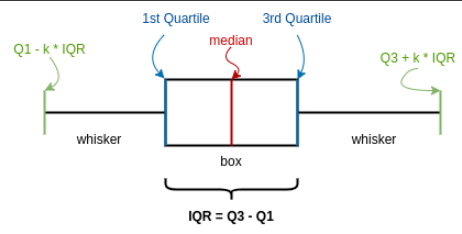

Para nuestro dataset todos los valores que se sitúan fuera del intervalo (1er cuartil - 3er cuartil) se consideran valores atípicos/extremos.

In [ ]:
#Validamos que características tienen mas probabilidades de presentar valores atípicos
head_df.describe()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
count     4600.00   4600.00    4600.00      4600.00    4600.00 4600.00   
mean    557905.90      3.40       1.79      2139.35   14852.52    1.46   
std     560917.63      0.91       0.75       963.21   35884.44    0.55   
min       7800.00      0.00       0.00       370.00     638.00    1.00   
25%     328158.93      3.00       1.00      1460.00    5000.75    1.00   
50%     468750.00      3.00       2.00      1980.00    7683.00    1.00   
75%     654962.50      4.00       2.00      2620.00   11001.25    2.00   
max   26590000.00      9.00       8.00     13540.00 1074218.00    3.00   

       waterfront    view  condition  sqft_above  sqft_basement  yr_built  \
count     4600.00 4600.00    4600.00     4600.00        4600.00   4600.00   
mean         0.01    0.24       3.45     1827.27         312.08   1970.79   
std          0.08    0.78       0.68      862.17         464.14     29.73   
min          0.00    0.00       1.00      370.00           0.00   1900.00   
25%          0.00    0.00       3.00     1190.00           0.00   1951.00   
50%          0.00    0.00       3.00     1590.00           0.00   1976.00   
75%          0.00    0.00       4.00     2300.00         610.00   1997.00   
max          1.00    4.00       5.00     9410.00        4820.00   2014.00   

       yr_renovated  
count       4600.00  
mean         808.61  
std          979.41  
min            0.00  
25%            0.00  
50%            0.00  
75%         1999.00  
max         2014.00

Examinando la tabla anterior, podemos ver que los valores de las características "price", "sqft_lot" y "sqft_basement" no se distribuyen por igual; es más probable que contengan valores extremos. Por lo tanto, extraeremos estas características y trataremos sus valores atípicos en las celdas siguientes

In [ ]:
# Desarrollamos una función que reemplaze los valores atipicos por NaN
def replace_outliers_with_nan_iqr(df, feature, inplace=False):
    desired_feature = df[feature]

    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [ ]:
features_with_outlier = ['price', 'sqft_lot', 'sqft_basement']

In [ ]:
# Haremos manejo de los valores atipicos, asignando el valor de la media a la caracteristica correspondiente

# Obtenemos los valores medios
features_means = head_df[features_with_outlier].mean()
# Iteramos a traves de las caracteristicas con valores atípicos
for i in features_with_outlier:
    replace_outliers_with_nan_iqr(head_df, i, inplace=True)

# Reemplazamos los valores NaN por el valor medio de cada caracteristica
head_df.fillna(features_means, inplace=True)
head_df.isnull().sum().sum()

0

In [ ]:
#Borramos las caracteristicas que no nos aportan valor a la solución
head_df.drop(['street', 'date', 'country'], axis=1, inplace=True)

In [ ]:
# cambiamos los nombres de las ciudades y el código postal a valores numéricos a partir de 0
head_df['city'], _ = pd.factorize(head_df['city'])
head_df['statezip'], _ = pd.factorize(head_df['statezip'])

In [ ]:
head_df.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 313000.00         3          1         1340   7912.00       1           0   
1 557905.90         5          2         3650   9050.00       2           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  \
0     0          3        1340           0.00      1955          2005     0   
1     4          5        3370         280.00      1921             0     1   

   statezip  
0         0  
1         1

#Analisis exploratorio de los datos (EDA)

In [ ]:
# Dibujamkos un boxen de una variable categorica vs como afecta a la variable objetivo que es price
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.boxenplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})

# Dibujamos el countplot de una variable categorica
def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x=df[feature])
    ax.set_title(f'{feature}\'s count', fontdict={'fontsize': 18})

# Dibujamos la distribución de los plots por caracteristica numerica
def draw_numeric_dist(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f'{feature}\'s distribution', fontdict={'fontsize': 18})

# Dibujamos un plot de tipo scatter donde represente la caracteristica numerica vs la variable objetivo price
def draw_numeric_target_scatter(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y='price')
    ax.set_title(f'{feature} vs price', fontdict={'fontsize': 18})
    plt.grid(True)

In [ ]:
head_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 313000.00         3          1         1340   7912.00       1           0   
1 557905.90         5          2         3650   9050.00       2           0   
2 342000.00         3          2         1930  11947.00       1           0   
3 420000.00         3          2         2000   8030.00       1           0   
4 550000.00         4          2         1940  10500.00       1           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  \
0     0          3        1340           0.00      1955          2005     0   
1     4          5        3370         280.00      1921             0     1   
2     0          4        1930           0.00      1966             0     2   
3     0          4        1000        1000.00      1963             0     3   
4     0          4        1140         800.00      1976          1992     4   

   statezip  
0         0  
1         1  
2         2  
3         3  
4         4

In [ ]:
# Extraemos las caracteristicas categoricas y numericas.
categorical_features = [
    'bedrooms',
    'bathrooms',
    'floors',
    'waterfront',
    'view',
    'condition'
]
numeric_features = list(set(head_df.columns)  - set(categorical_features))

##Variables categoricas

###Bedrooms


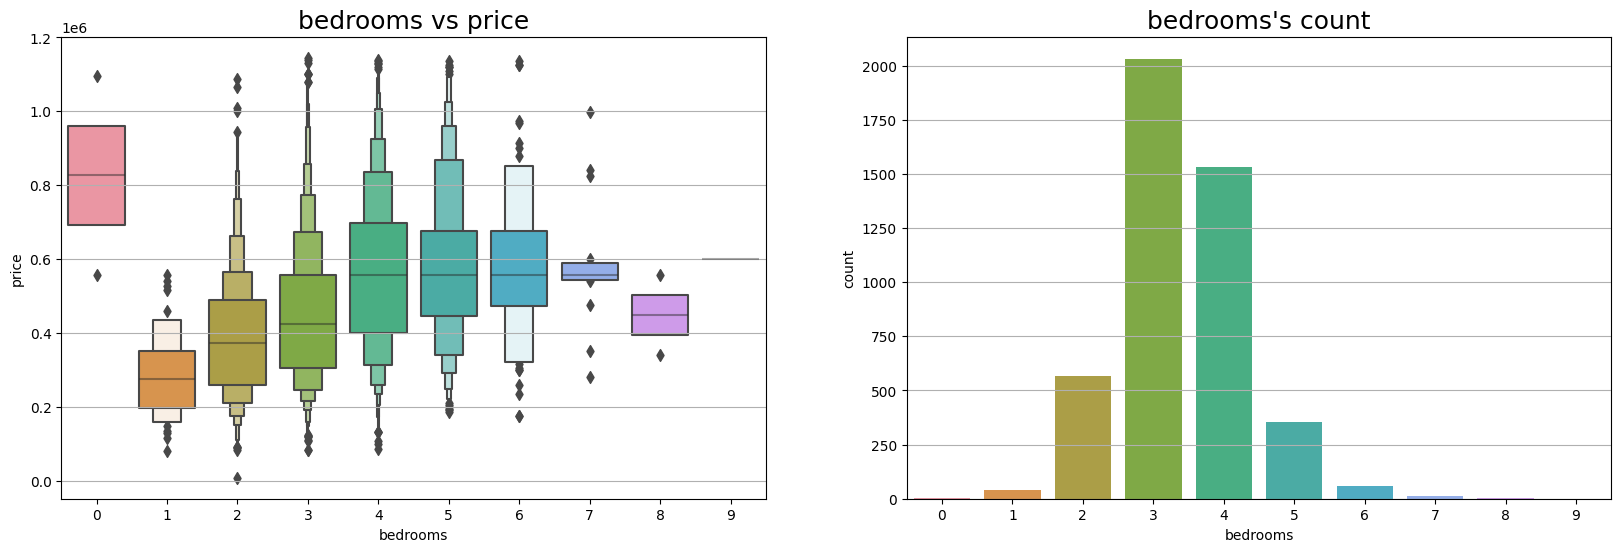

In [ ]:
#Dibujamos un recuadro de comparación entre bedrooms y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[0])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[0])
plt.show()

Respecto al grafico anterior, hemos notado que:
- La mayoría de las casas de este conjunto de datos tienen 3 dormitorios.
- Todas las casas de este conjunto de datos tienen de 0 a 9 dormitorios.
- Normalmente, el número de dormitorios influye directamente en el precio de una casa. Es decir, el precio sube cuando aumenta el número de dormitorios.
- Una excepción es cuando el número de dormitorios es 0 y el precio es el más alto.

###Bathrooms


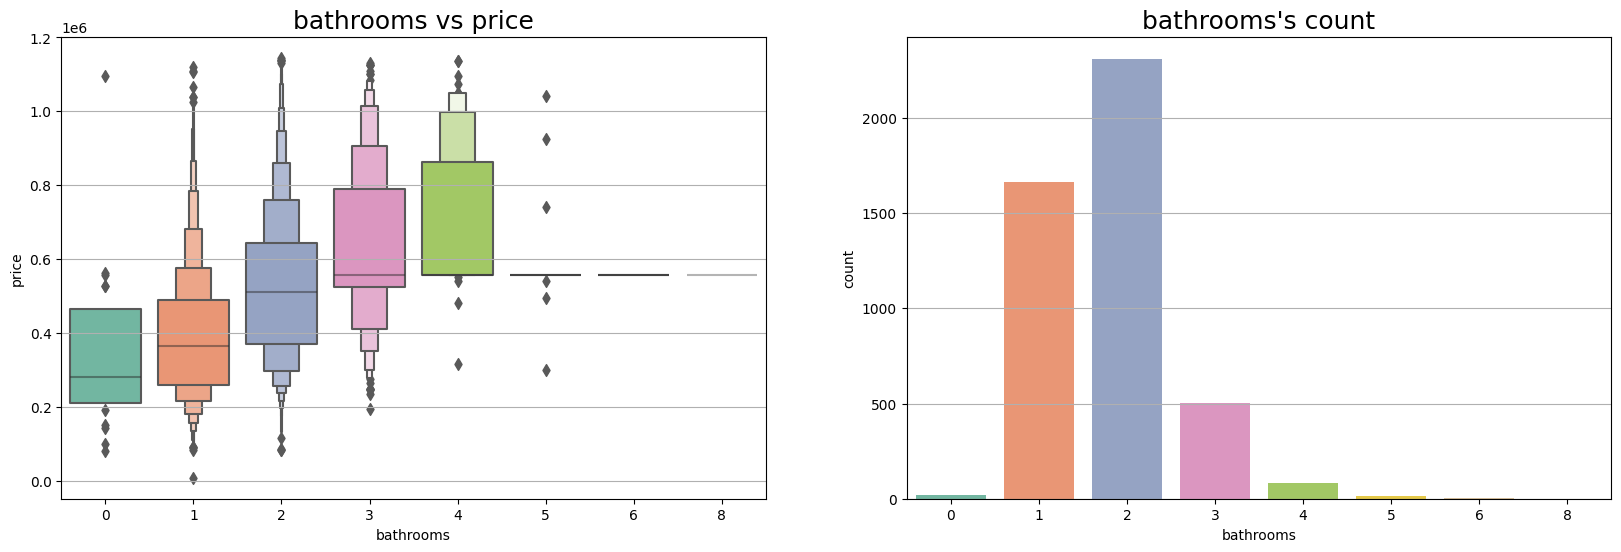

In [ ]:
#Dibujamos un recuadro de comparación entre bathrooms y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[1])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[1])
plt.show()

Visualizando el grafico podemos concluir que:
- La mayoría de las casas de este conjunto de datos tiene 2 baños.
- Todas las casas de este conjunto de datos tienen de 0 a 8 cuartos de baño.
- El número de cuartos de baño influye directamente en el precio de una casa. Es decir, el precio sube cuando aumenta el número de cuartos de baño, y viceversa.

### Floors


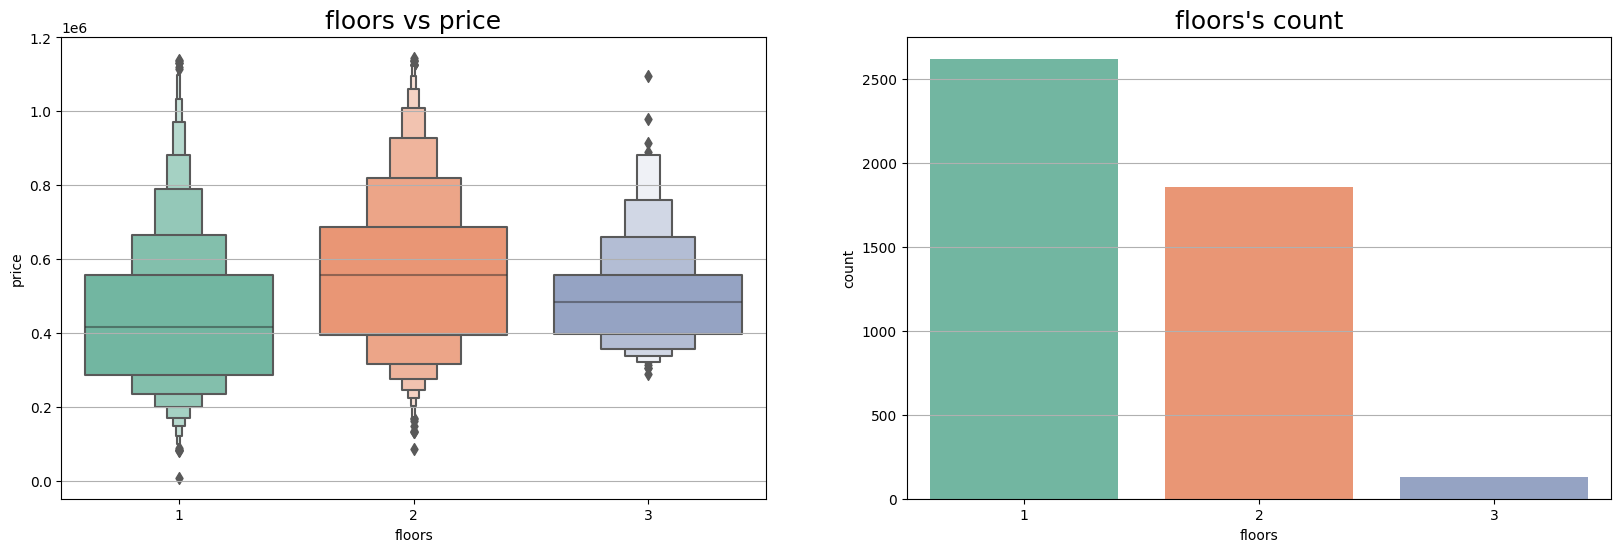

In [ ]:
#Dibujamos un recuadro de comparación entre floors y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[2])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[2])
plt.show()

Si notamos el grafico, podemos visualizar que:
- La mayoría de las casas de este conjunto de datos tiene sólo 1 planta.
- Todas las casas de este conjunto de datos tienen de 1 a 3 plantas.
 Los precios de la mayoría de las casas de 2 plantas son más altos que los de las de 1 ó 3 plantas.
- Las casas de 1 sola planta tienen el precio medio más bajo.

###Waterfront


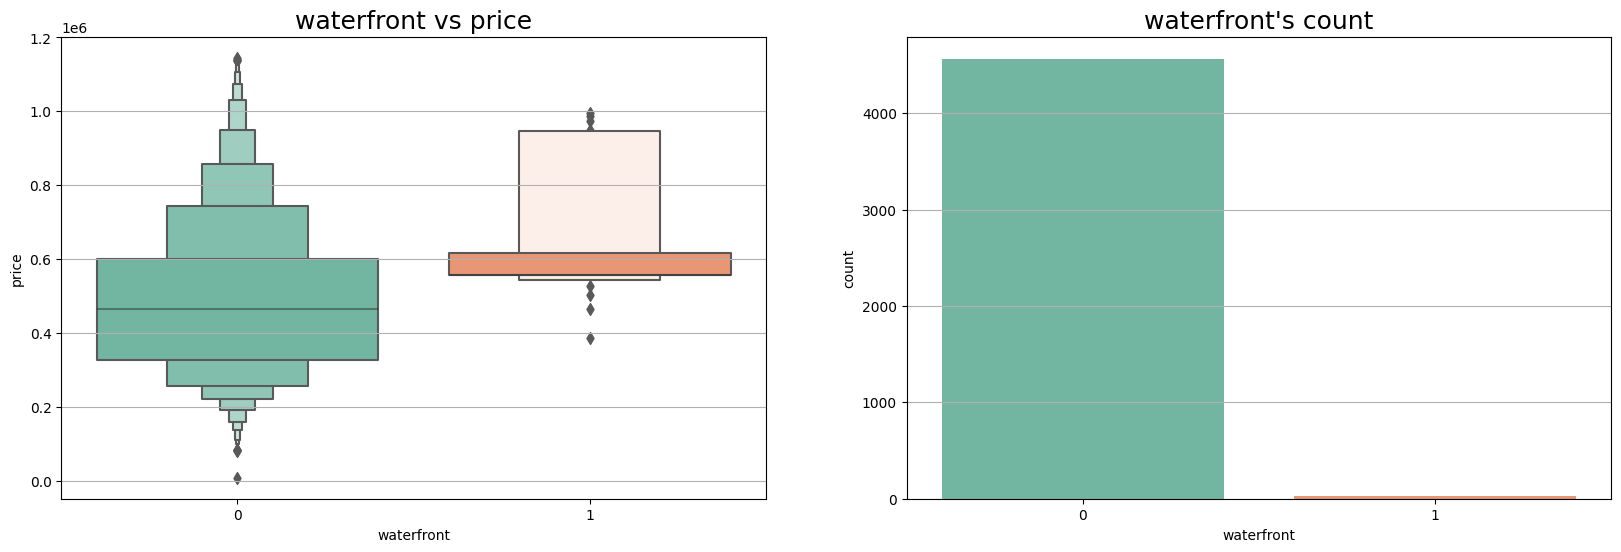

In [ ]:
#Dibujamos un recuadro de comparación entre waterfront y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[3])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[3])
plt.show()

Logramos notar mediante el grafico que:
- La mayoría de las casas de este conjunto de datos no tienen frente de agua.
- Los precios de las casas con frente de agua son más altos que los de las que no lo tienen.

###View


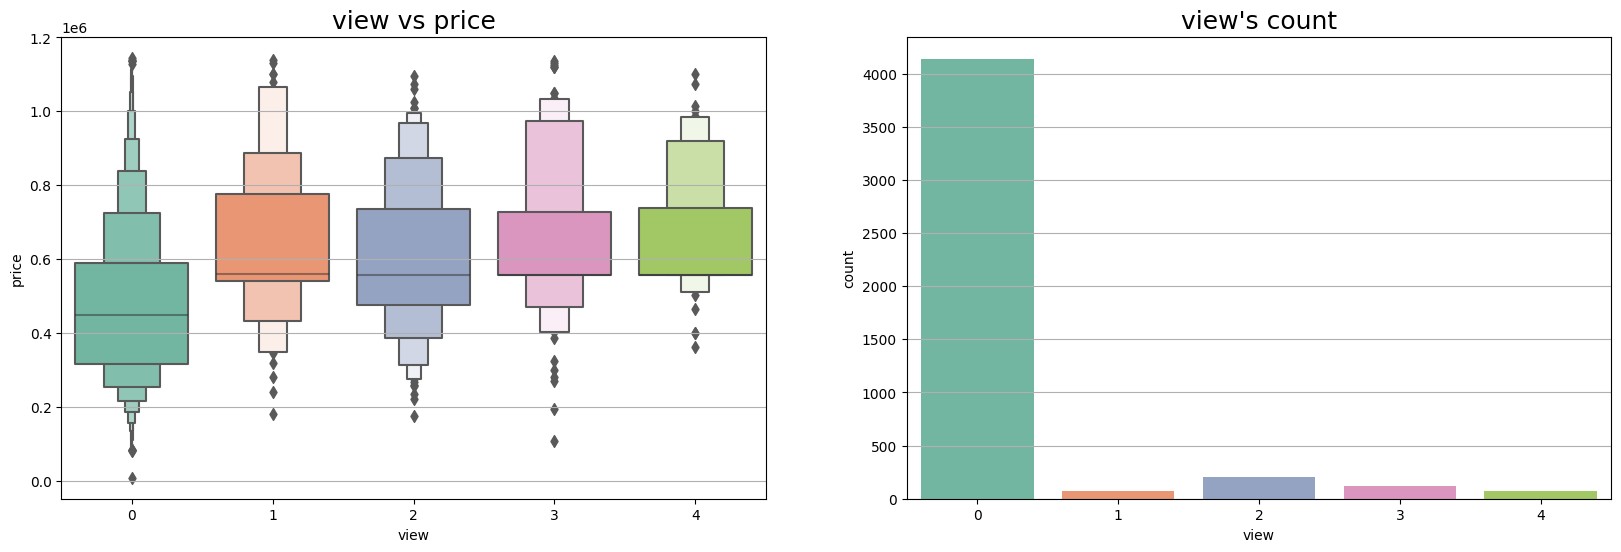

In [ ]:
#Dibujamos un recuadro de comparación entre view y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[4])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[4])
plt.show()

Respecto al grafico de view vs price podemos notar que:
- La mayoría de las casas de este conjunto de datos no tienen vistas.
- Los precios de las casas con vistas son más altos que los de las que no las tienen.

##condition

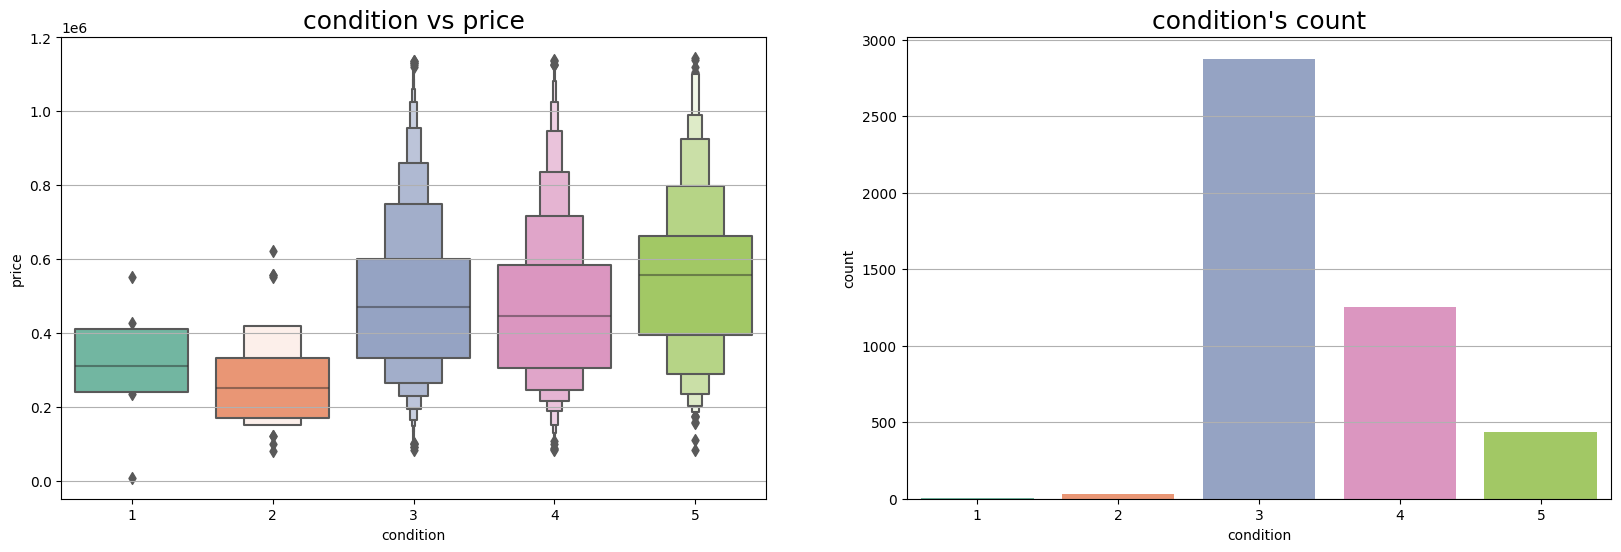

In [ ]:
#Dibujamos un recuadro de comparación entre condition y price
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')
plt.subplot(1, 2, 1)
draw_cate_vs_target(head_df, categorical_features[5])

plt.subplot(1, 2, 2)
draw_cate_countplot(head_df, categorical_features[5])
plt.show()

Del grafico podemos obtener:
- Todas las casas de este conjunto de datos tienen un estado [nivel] de 1 a 5.
- La mayoría de las viviendas de este conjunto de datos tienen un estado [nivel] 3.
- El precio medio de las casas con un estado [nivel] de 5 es el más alto, seguido de los de 3 y 4. El precio medio más bajo corresponde a las casas con un estado [nivel] de 4.
- El precio medio más bajo corresponde a las viviendas con un estado [nivel] 2.

##Variables numericas

In [ ]:
numeric_features

['sqft_basement',
 'sqft_living',
 'sqft_above',
 'price',
 'yr_built',
 'sqft_lot',
 'city',
 'statezip',
 'yr_renovated']

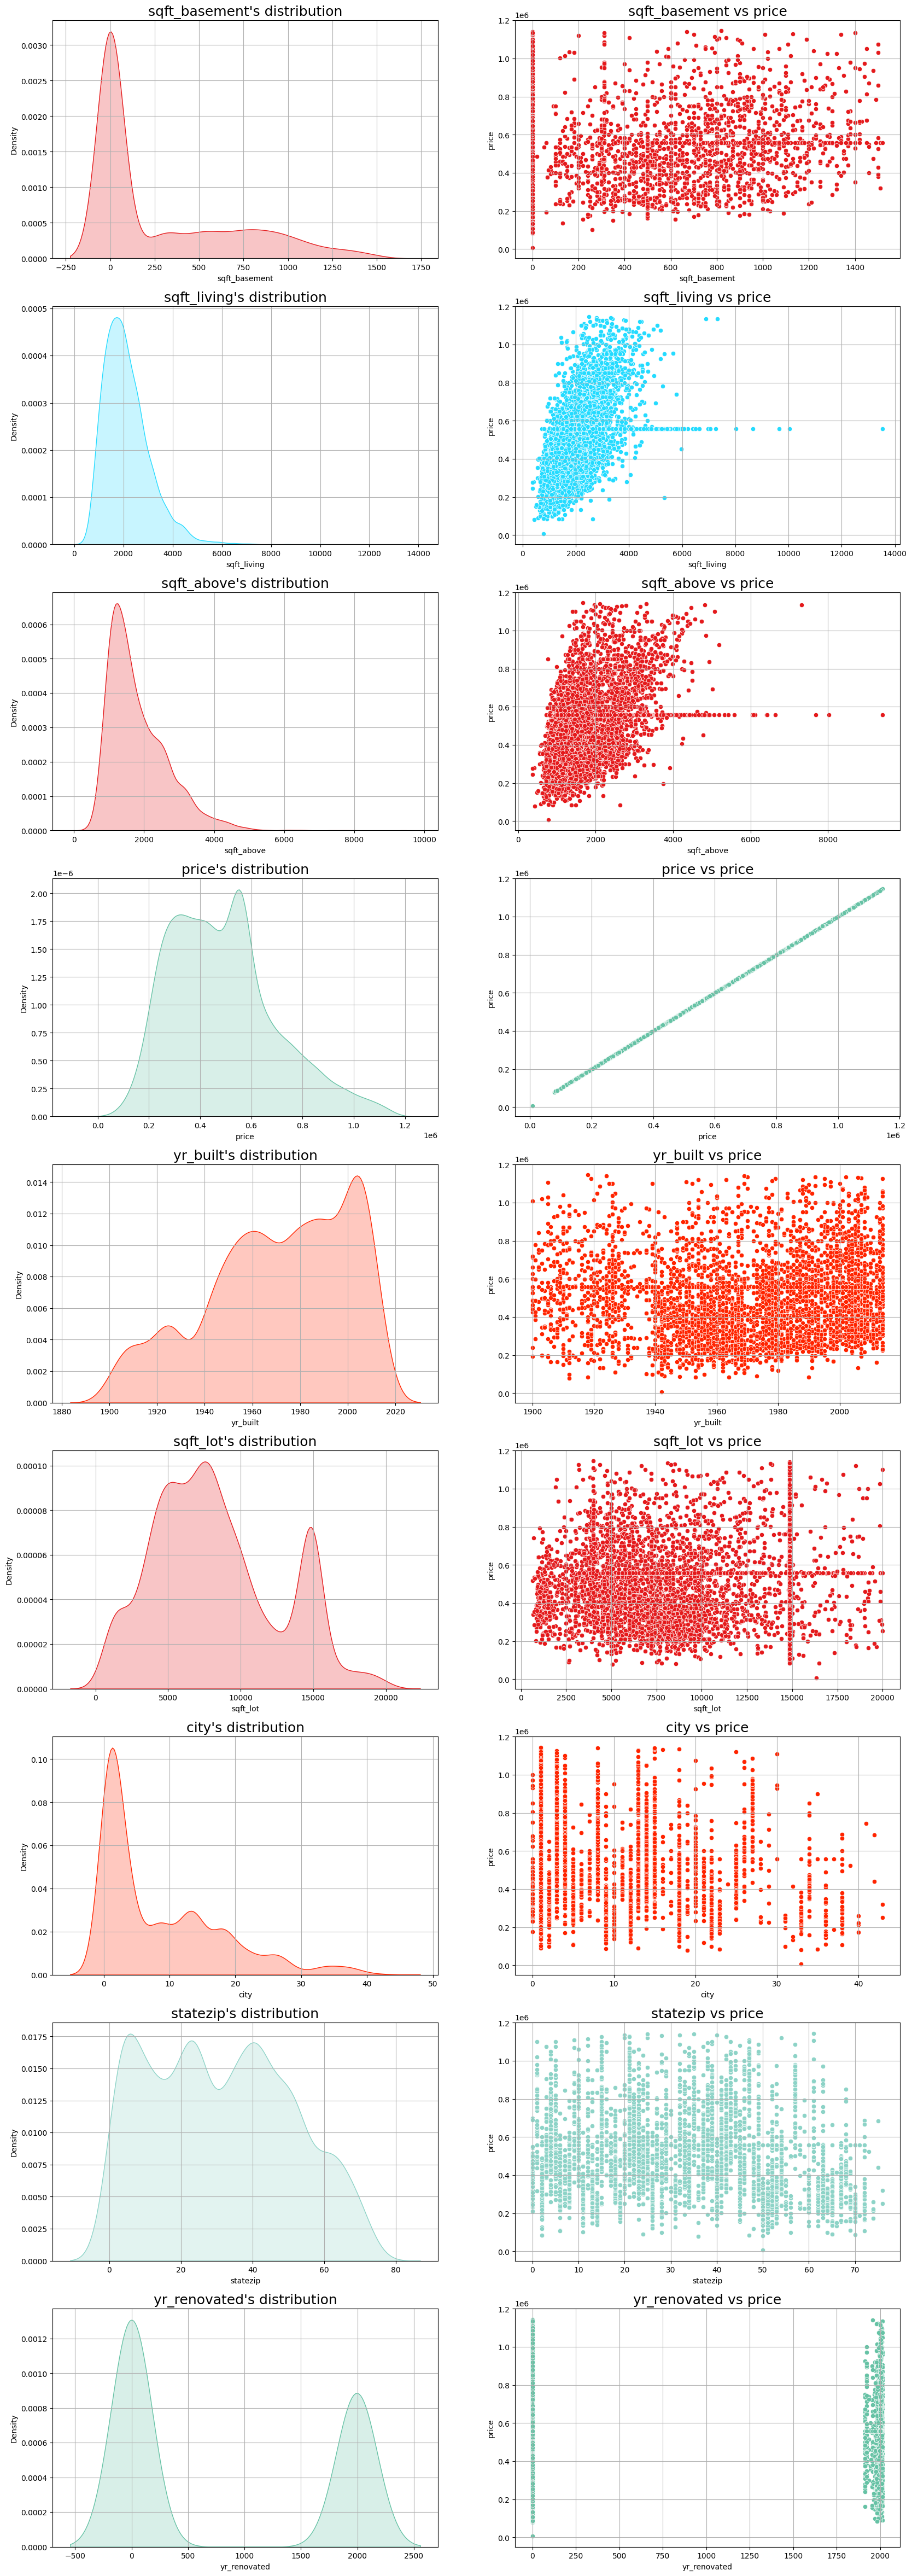

In [ ]:
# Dibujamos algunos graficos para todas las caracteristicas numericas vs price
plt.figure(figsize=(20, 60))

palettes = ['Set1', 'Set2', 'Set3', 'autumn', 'cool']
for i, feature in enumerate(numeric_features):
    sns.set_palette(random.choice(palettes))
    # distribución
    plt.subplot(len(numeric_features), 2, i+i+1)
    draw_numeric_dist(head_df, feature)
    # scatter
    plt.subplot(len(numeric_features), 2, i+i +2)
    draw_numeric_target_scatter(head_df, feature)

plt.show()

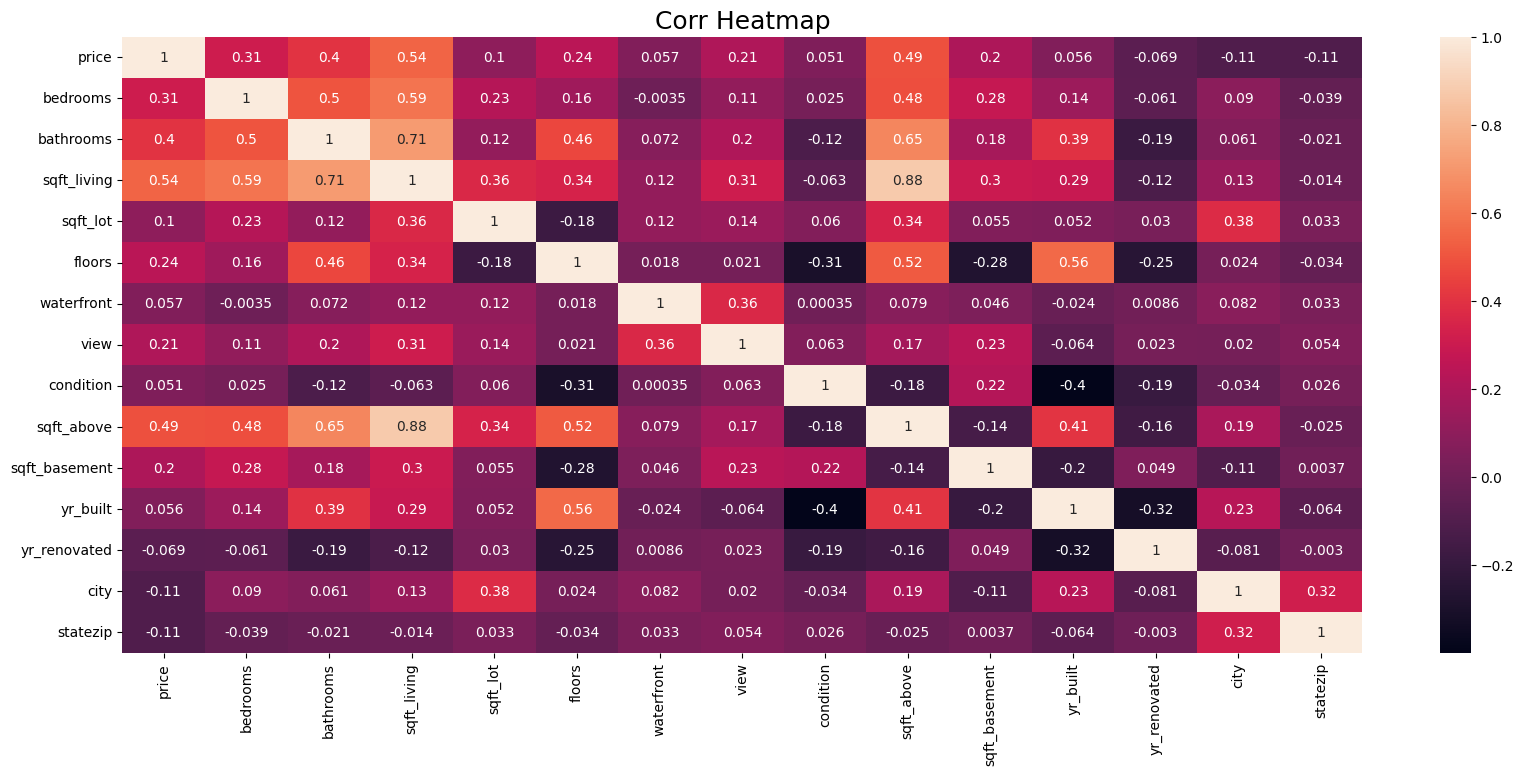

In [ ]:
# Dibujamos el mapa de calor para una matriz de correlacción entre las caracteristicas categoricas y numericas
plt.figure(figsize=(20, 8))
ax = sns.heatmap(head_df.corr(), annot=True)
ax.set_title('Corr Heatmap', fontdict={'fontsize': 18})
plt.show()

In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.1.1
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': df, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
SAMPLE_SIZE = 4600 #@param

dive = df.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=dive)
display(HTML(html))

#Diseñando los modelos

In [ ]:
X = head_df.drop('price', axis=1)
y = head_df['price']

Seleccionamos las caracteristicas mediante información mutua.
En este caso "precio", interactua cómo una característica concreta modificando la variable objetivo.
Cuanto mayor sea la puntuación, mayor será la interacción.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    mi = mutual_info_regression(X, y, random_state=10)
    mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi

In [ ]:
mi_score = get_mi_score(X, y)
mi_score

statezip        0.4
sqft_living     0.3
city            0.3
sqft_above      0.2
bathrooms       0.1
                 ..
sqft_basement   0.1
view            0.0
waterfront      0.0
condition       0.0
yr_renovated    0.0
Length: 14, dtype: float64

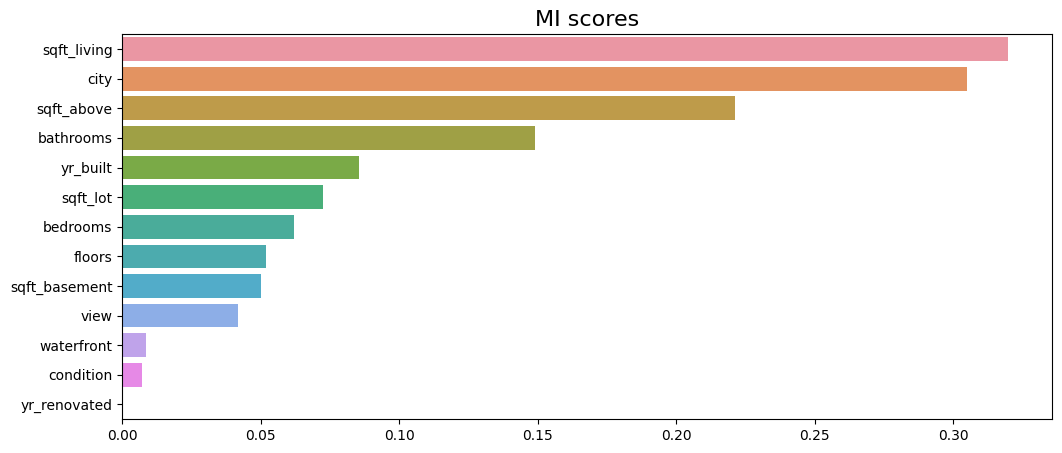

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y=mi_score.index[1:], x=mi_score[1:])
ax.set_title('MI scores', fontdict={'fontsize': 16})
plt.show()

Puede ver que yr_renovated tiene la puntuación mínima de MI (0,0017), lo que significa que es la variable menos eficaz, por lo que podemos considerar eliminarla.

In [ ]:
X.drop(['yr_renovated'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

## Polynomial Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear un pipeline que incluye tanto la generación de características polinomiales
# como la regresión lineal

polynomial_regression_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Transformar las características originales en polinomiales
    ('linear_regression', LinearRegression())          # Aplicar regresión lineal
])

polynomial_regression_pipeline.fit(X_train, y_train)

#Prediccion de X_train
y_pred_PL_train = polynomial_regression_pipeline.predict(X_train)
#Predicción de X_test
y_pred_PL = polynomial_regression_pipeline.predict(X_test)

### Metricas

In [ ]:
#Entrenamiento
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, mean_absolute_percentage_error
# RMSE
rmse = mean_squared_error(y_train, y_pred_PL_train, squared=True)
# MSE
mse = mean_squared_error(y_train, y_pred_PL_train)
#R2
r_squared = r2_score(y_train, y_pred_PL_train)
#MAE
#mae = mean_absolute_error(y_train, y_pred_PL_train)
#MSPE
mspe = np.mean((y_train - y_pred_PL_train)**2)
r2tr_PL= r_squared
#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_train, y_pred_PL_train))

RMSE:  20187751626.752563
r_squared:  0.5295042188684858
mspe:  20187751626.752563
Porcentaje MAE:  0.2604309159774277


In [ ]:
#TEST
# RMSE
rmse = mean_squared_error(y_test, y_pred_PL, squared=True)
# MSE
#mse = mean_squared_error(y_test, y_pred_PL)
#R2
r_squared = r2_score(y_test, y_pred_PL)
#MAE
#mae = mean_absolute_error(y_test, y_pred_PL)
#MSPE
mspe = np.mean((y_test - y_pred_PL)**2)
r2te_PL=r_squared
#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_test, y_pred_PL))
Pmaet_PL=mean_absolute_percentage_error(y_test, y_pred_PL)

RMSE:  23176394357.52455
r_squared:  0.4665816463970257
mspe:  23176394357.52455
Porcentaje MAE:  0.2755051026261132


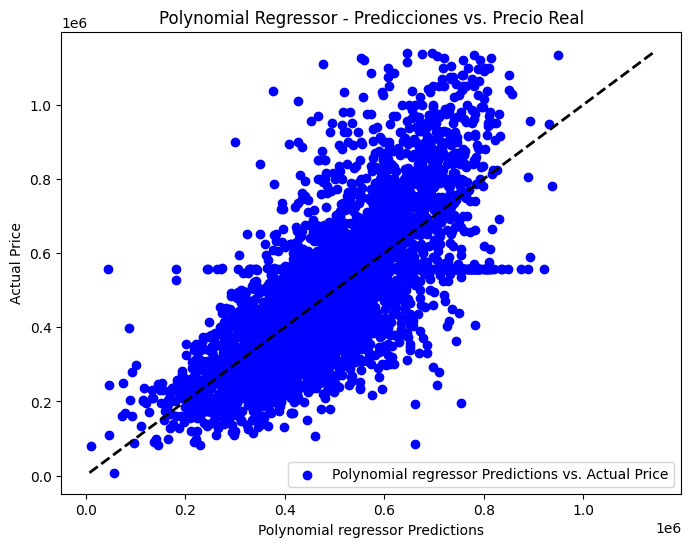

In [ ]:
# Gráfico de dispersión para datos de prueba (X_train vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_PL_train, y_train, c='b', label='Polynomial regressor Predictions vs. Actual Price')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Polynomial regressor Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Polynomial Regressor - Predicciones vs. Precio Real')
plt.show()

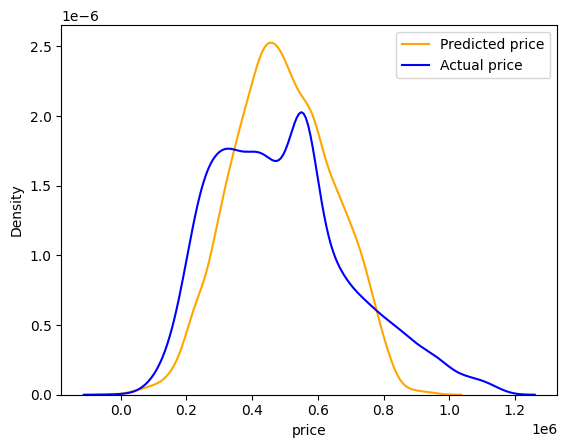

In [ ]:
sns.kdeplot(x=y_pred_PL_train,color="orange",label="Prdicted price")
sns.kdeplot(x=y_train,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

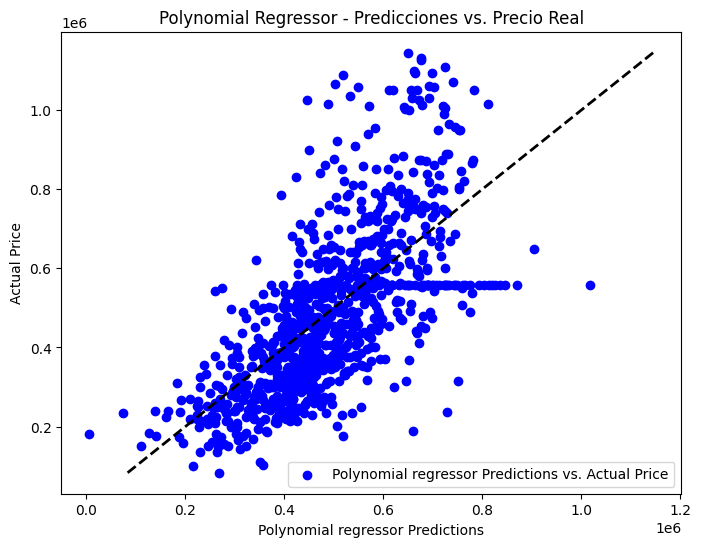

In [ ]:
# Gráfico de dispersión para datos de prueba (X_test vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_PL, y_test, c='b', label='Polynomial regressor Predictions vs. Actual Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Polynomial regressor Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Polynomial Regressor - Predicciones vs. Precio Real')
plt.show()

##Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_random = RandomForestRegressor(n_estimators=20)
model_random.fit(X_train, y_train)

#Prediccion de X_train
y_pred_random_train = model_random.predict(X_train)
#Predicción de X_test
y_pred_random = model_random.predict(X_test)

###Metricas

In [ ]:
#Entrenamiento
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, mean_absolute_percentage_error
# RMSE
rmse = mean_squared_error(y_train, y_pred_random_train, squared=True)
# MSE
mse = mean_squared_error(y_train, y_pred_random_train)
#R2
r_squared = r2_score(y_train, y_pred_random_train)
#MAE
#mae = mean_absolute_error(y_train, y_pred_random_train)
#MSPE
mspe = np.mean((y_train - y_pred_random_train)**2)
r2tr_RF= r_squared
#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_train, y_pred_random_train))

RMSE:  2459188887.3811936
r_squared:  0.9426861387087276
mspe:  2459188887.3811936
Porcentaje MAE:  0.07998943706423381


In [ ]:
#TEST
# RMSE
rmse = mean_squared_error(y_test, y_pred_random, squared=True)
# MSE
#mse = mean_squared_error(y_test, y_pred_random)
#R2
r_squared = r2_score(y_test, y_pred_random)
#MAE
#mae = mean_absolute_error(y_test, y_pred_random)
#MSPE
mspe = np.mean((y_test - y_pred_random)**2)
r2te_RF=r_squared
#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_test, y_pred_random))
Pmaet_RF=mean_absolute_percentage_error(y_test, y_pred_random)

RMSE:  15289326326.316708
r_squared:  0.6481071580474452
mspe:  15289326326.316708
Porcentaje MAE:  0.20202129887244225


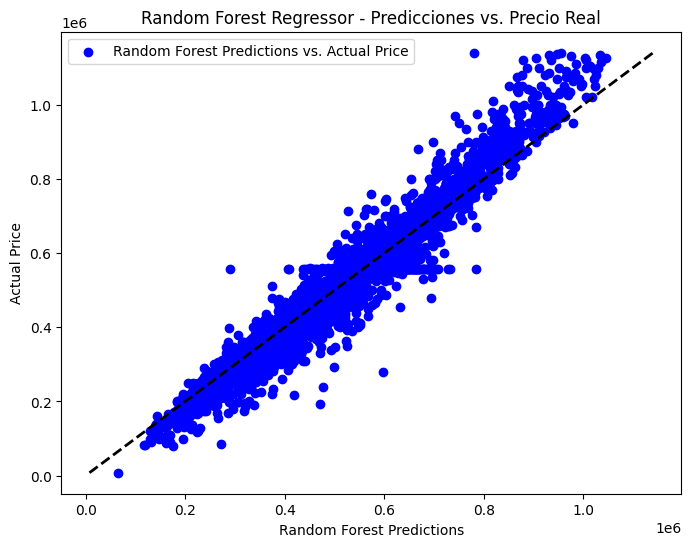

In [ ]:
# Gráfico de dispersión para datos de entrenamiento (X_train vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_random_train, y_train, c='b', label='Random Forest Predictions vs. Actual Price')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Random Forest Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Random Forest Regressor - Predicciones vs. Precio Real')
plt.show()

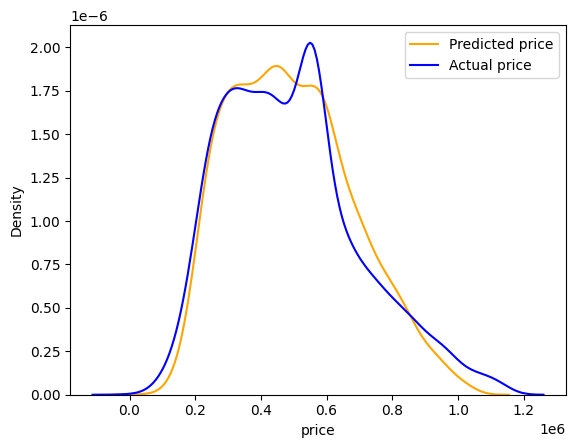

In [ ]:
sns.kdeplot(x=y_pred_random_train,color="orange",label="Prdicted price")
sns.kdeplot(x=y_train,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

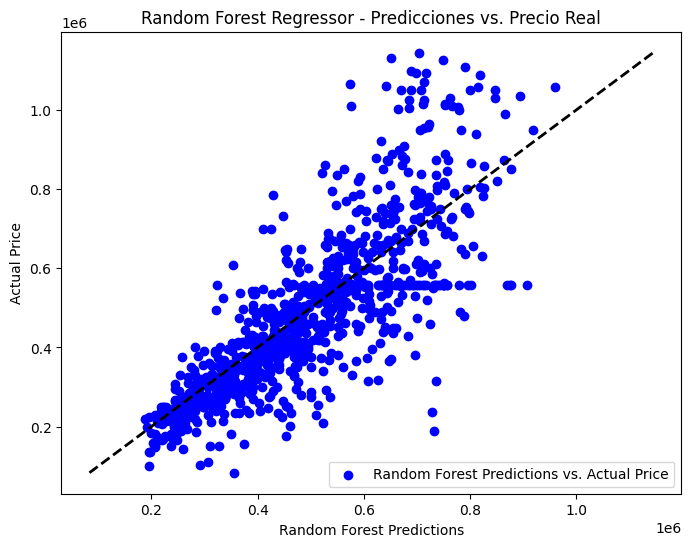

In [ ]:
# Gráfico de dispersión para datos de prueba (X_test vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_random, y_test, c='b', label='Random Forest Predictions vs. Actual Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Random Forest Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Random Forest Regressor - Predicciones vs. Precio Real')
plt.show()

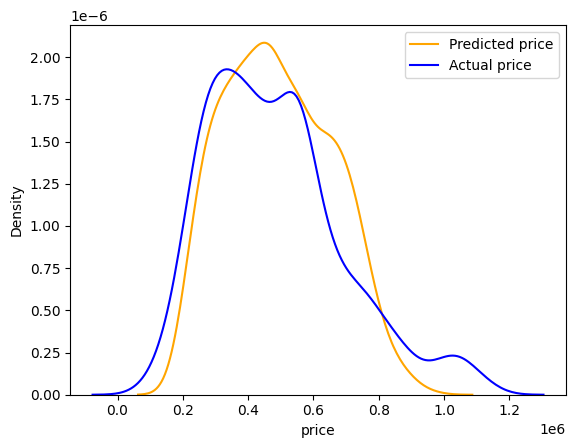

In [ ]:
sns.kdeplot(x=y_pred_random,color="orange",label="Prdicted price")
sns.kdeplot(x=y_test,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

# ##XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)#xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

#Prediccion de X_train
y_pred_xgb_train = xgb_model.predict(X_train)
#Prediccion de X_test
y_pred_xgb = xgb_model.predict(X_test)

[0]	validation_0-rmse:203304.66091
[1]	validation_0-rmse:198307.57165
[2]	validation_0-rmse:193579.30847
[3]	validation_0-rmse:189157.84150
[4]	validation_0-rmse:185020.12152
[5]	validation_0-rmse:181220.22249
[6]	validation_0-rmse:177746.34767
[7]	validation_0-rmse:174446.13957
[8]	validation_0-rmse:171486.51132
[9]	validation_0-rmse:168655.93674
[10]	validation_0-rmse:165957.77789
[11]	validation_0-rmse:163648.45006
[12]	validation_0-rmse:161251.00193
[13]	validation_0-rmse:159157.48363
[14]	validation_0-rmse:157053.63587
[15]	validation_0-rmse:155119.56823
[16]	validation_0-rmse:153479.96668
[17]	validation_0-rmse:151866.25545
[18]	validation_0-rmse:150498.91449
[19]	validation_0-rmse:148917.30225
[20]	validation_0-rmse:147453.43409
[21]	validation_0-rmse:146005.21220
[22]	validation_0-rmse:144990.51048
[23]	validation_0-rmse:143824.49284
[24]	validation_0-rmse:142780.46455
[25]	validation_0-rmse:141824.03944
[26]	validation_0-rmse:140671.06400
[27]	validation_0-rmse:139651.50628
[2

###Metricas


In [ ]:
#Entrenamiento
# RMSE
rmse = mean_squared_error(y_train, y_pred_xgb_train, squared=True)
# MSE
#mse = mean_squared_error(y_train, y_pred_xgb_train)
#R2
r_squared = r2_score(y_train, y_pred_xgb_train)
#MAE
#mae = mean_absolute_error(y_train, y_pred_xgb_train)
#MSPE
mspe = np.mean((y_train - y_pred_xgb_train)**2)
r2tr_XG=r_squared

print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_train, y_pred_xgb_train))

MSE:  2459188887.3811936
RMSE:  797530715.8732114
r_squared:  0.9814127474877448
mspe:  797530715.8732114
Porcentaje MAE:  0.04653323919512889


In [ ]:
#Test
# RMSE
rmse = mean_squared_error(y_test, y_pred_xgb, squared=True)
# MSE
#mse = mean_squared_error(y_test, y_pred_xgb)
#R2
r_squared = r2_score(y_test, y_pred_xgb)
#MAE
#mae = mean_absolute_error(y_test, y_pred_xgb)
#MSPE
mspe = np.mean((y_test - y_pred_xgb)**2)


print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_test, y_pred_xgb))
r2te_XG=r_squared
Pmaet_XG=mean_absolute_percentage_error(y_test, y_pred_xgb)

MSE:  2459188887.3811936
RMSE:  14474884177.381086
r_squared:  0.6668520233396196
mspe:  14474884177.381086
Porcentaje MAE:  0.19240782964601413


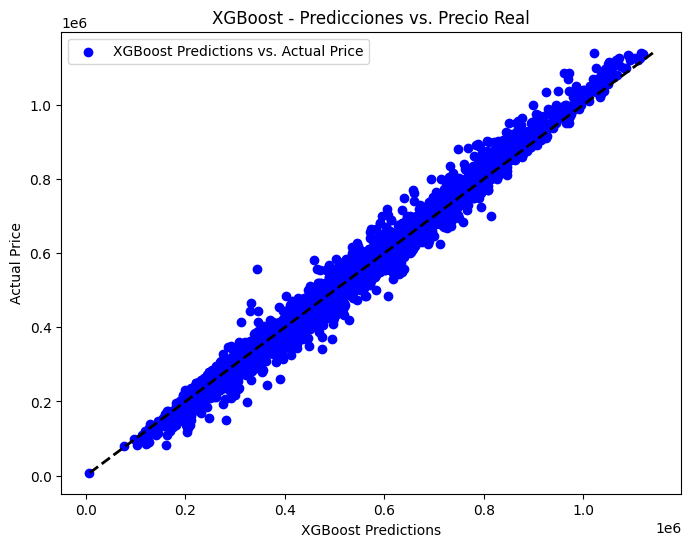

In [ ]:
# Gráfico de dispersión para datos de entrenamiento (X_train vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb_train, y_train, c='b', label='XGBoost Predictions vs. Actual Price')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('XGBoost Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('XGBoost - Predicciones vs. Precio Real')
plt.show()

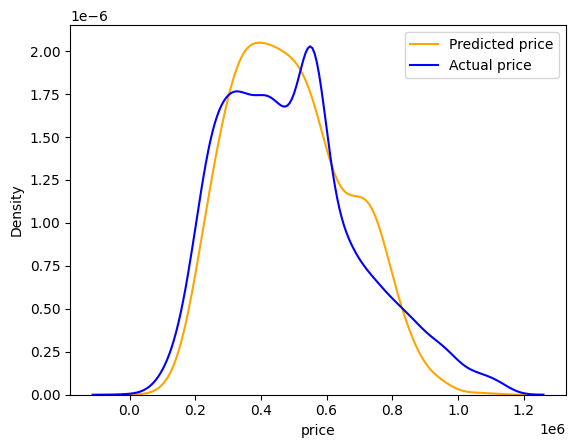

In [ ]:
sns.kdeplot(x=y_pred_xgb,color="orange",label="Prdicted price")
sns.kdeplot(x=y_train,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

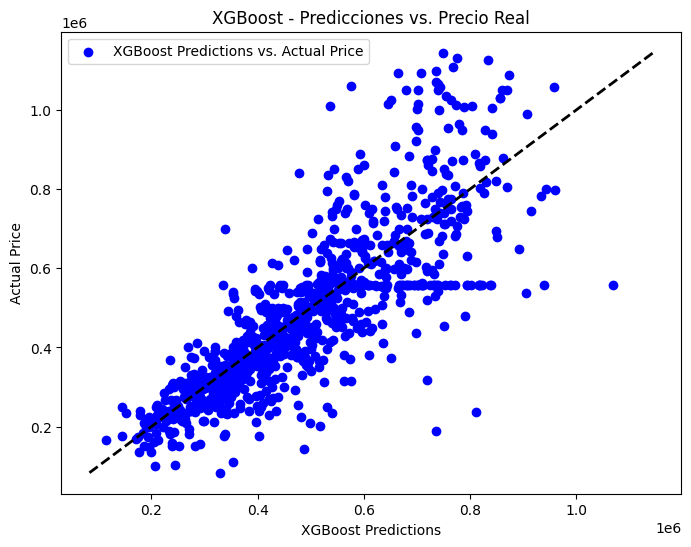

In [ ]:
# Gráfico de dispersión para datos de prueba (X_test vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, y_test, c='b', label='XGBoost Predictions vs. Actual Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('XGBoost Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('XGBoost - Predicciones vs. Precio Real')
plt.show()

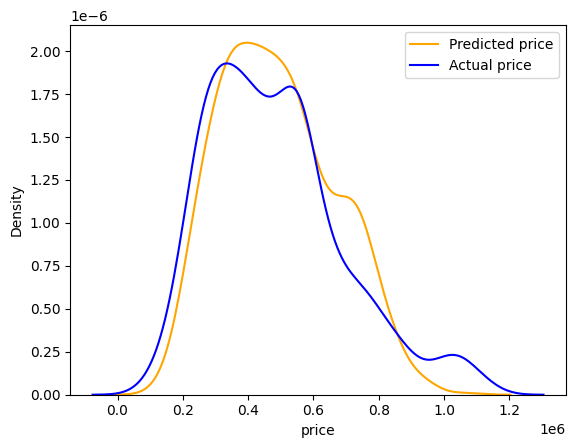

In [ ]:
sns.kdeplot(x=y_pred_xgb,color="orange",label="Prdicted price")
sns.kdeplot(x=y_test,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

##Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVR

model_SVR = svm.SVR(kernel='linear')
model_SVR.fit(X_train,y_train)

#Prediccion de X_train
Y_pred_SVR_train = model_SVR.predict(X_train)
#Prediccion de X_test
Y_pred_SVR = model_SVR.predict(X_test)

###Metricas

In [ ]:
#Entrenamiento
# RMSE
rmse = mean_squared_error(y_train, Y_pred_SVR_train, squared=True)
# MSE
#mse = mean_squared_error(y_train, Y_pred_SVR_train)
#R2
r_squared = r2_score(y_train, Y_pred_SVR_train)
#MAE
#mae = mean_absolute_error(y_train, Y_pred_SVR_train)
#MSPE
mspe = np.mean((y_train - Y_pred_SVR_train)**2)
r2tr_SV=r_squared

#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_train, Y_pred_SVR_train))

RMSE:  28010491184.121155
r_squared:  0.34718743457859547
mspe:  28010491184.121155
Porcentaje MAE:  0.30708031203491853


In [ ]:
# RMSE
rmse = mean_squared_error(y_test, Y_pred_SVR, squared=True)
# MSE
#mse = mean_squared_error(y_test, Y_pred_SVR)
#R2
r_squared = r2_score(y_test, Y_pred_SVR)
#MAE
#mae = mean_absolute_error(y_test, Y_pred_SVR)
#MSPE
mspe = np.mean((y_test - Y_pred_SVR)**2)

#print('MSE: ', mse)
print('RMSE: ', rmse)
print('r_squared: ', r_squared)
#print('mae: ', mae)
print('mspe: ', mspe)
print('Porcentaje MAE: ',mean_absolute_percentage_error(y_test, Y_pred_SVR))
r2te_SV=r_squared
Pmaet_SV=mean_absolute_percentage_error(y_test, Y_pred_SVR)

RMSE:  27957926588.37762
r_squared:  0.3565318685525646
mspe:  27957926588.37762
Porcentaje MAE:  0.30524549387808264


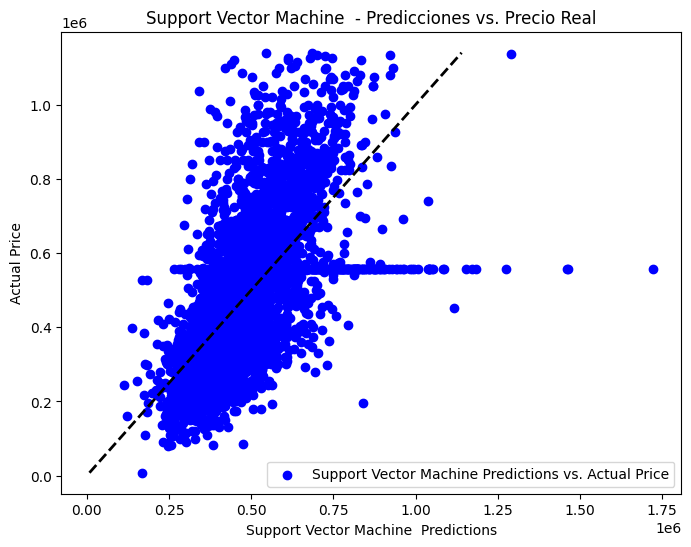

In [ ]:
# Gráfico de dispersión para datos de entrenamiento (X_train vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_SVR_train, y_train, c='b', label='Support Vector Machine Predictions vs. Actual Price')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Support Vector Machine  Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Support Vector Machine  - Predicciones vs. Precio Real')
plt.show()

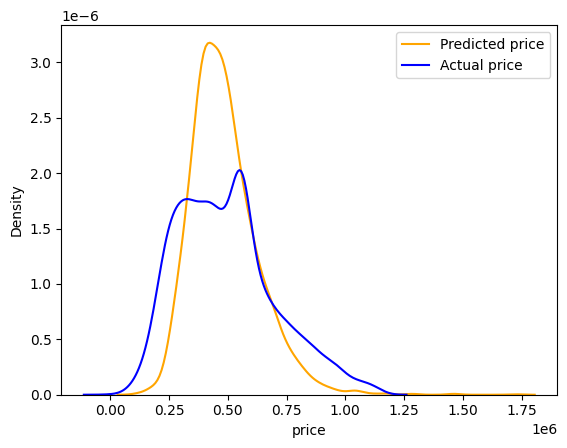

In [ ]:
sns.kdeplot(x=Y_pred_SVR_train,color="orange",label="Prdicted price")
sns.kdeplot(x=y_train,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

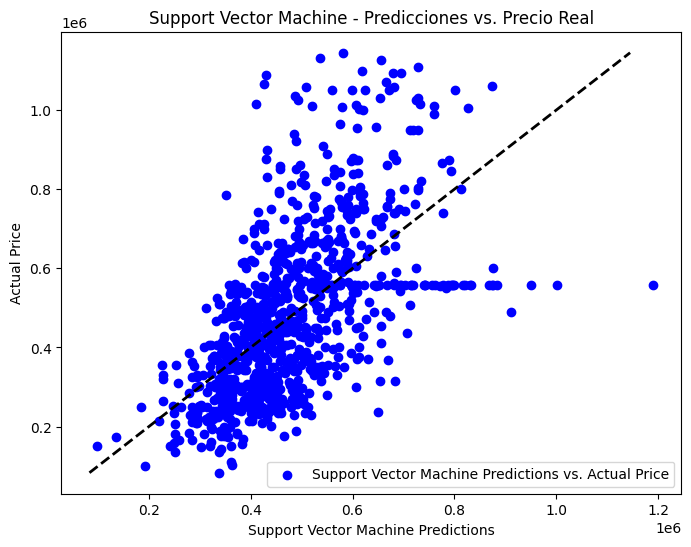

In [ ]:
# Gráfico de dispersión para datos de prueba (X_test vs. price)
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_SVR, y_test, c='b', label='Support Vector Machine Predictions vs. Actual Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Support Vector Machine Predictions')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Support Vector Machine - Predicciones vs. Precio Real')
plt.show()

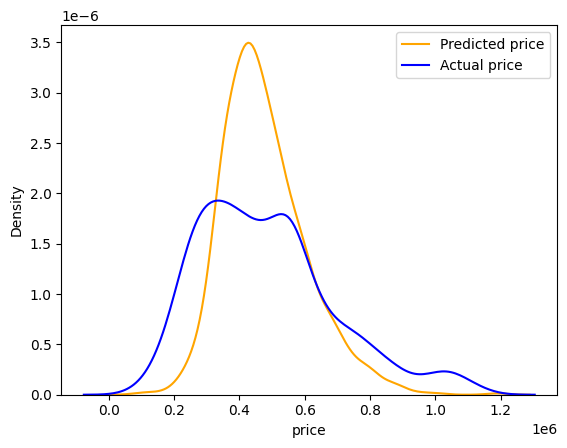

In [ ]:
sns.kdeplot(x=Y_pred_SVR,color="orange",label="Prdicted price")
sns.kdeplot(x=y_test,color="blue",label="Actual price")
plt.legend(["Predicted price","Actual price"])
plt.show()

# Resumen

In [ ]:
pd.set_option('display.precision', 5)

In [ ]:
models = pd.DataFrame({
    'Model': [
        'XGBoost','Random Forest', 'Support Vector Regression', 'Polynomial Regression'
    ],
    'Training R2 Score': [
        r2tr_XG,r2tr_RF,r2tr_SV,r2tr_PL
    ],
    'MAE Percentage': [
       Pmaet_XG,Pmaet_RF,Pmaet_SV,Pmaet_PL
    ],
    'Testing R2 Score': [
        r2te_XG,r2te_RF,r2te_SV,r2te_PL
    ],

})

In [ ]:
models=models.round(5)

In [ ]:
# Convertir los valores flotantes a cadenas con la cantidad deseada de decimales
models['Training R2 Score'] = models['Training R2 Score'].apply(lambda x: f'{x:.5f}')
models['MAE Percentage'] = models['MAE Percentage'].apply(lambda x: f'{x:.5f}')
models['Testing R2 Score'] = models['Testing R2 Score'].apply(lambda x: f'{x:.5f}')

# Ahora cuando ordenes y muestres el DataFrame, los valores deberían aparecer con 5 decimales
models_sorted = models.sort_values(by='Testing R2 Score', ascending=False)
models_sorted


Model Training R2 Score MAE Percentage Testing R2 Score
0                    XGBoost           0.98141        0.19241          0.66685
1              Random Forest           0.94269        0.20202          0.64811
3      Polynomial Regression           0.52950        0.27551          0.46658
2  Support Vector Regression           0.34719        0.30525          0.35653